In [2]:
import csv
import pandas as pd 
import numpy as np
from math import log
from sklearn.model_selection import train_test_split

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test_data = pd.read_csv("/Users/lisimei/Documents/Master-VU-UvA/UvA-DM/final/data/test_set_VU_DM.csv")
train_data = pd.read_csv("/Users/lisimei/Documents/Master-VU-UvA/UvA-DM/final/data/training_set_VU_DM.csv")

In [5]:
data=train_data
data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [6]:
display(train_data.describe())

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [8]:
data.isnull().sum(axis=0)

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

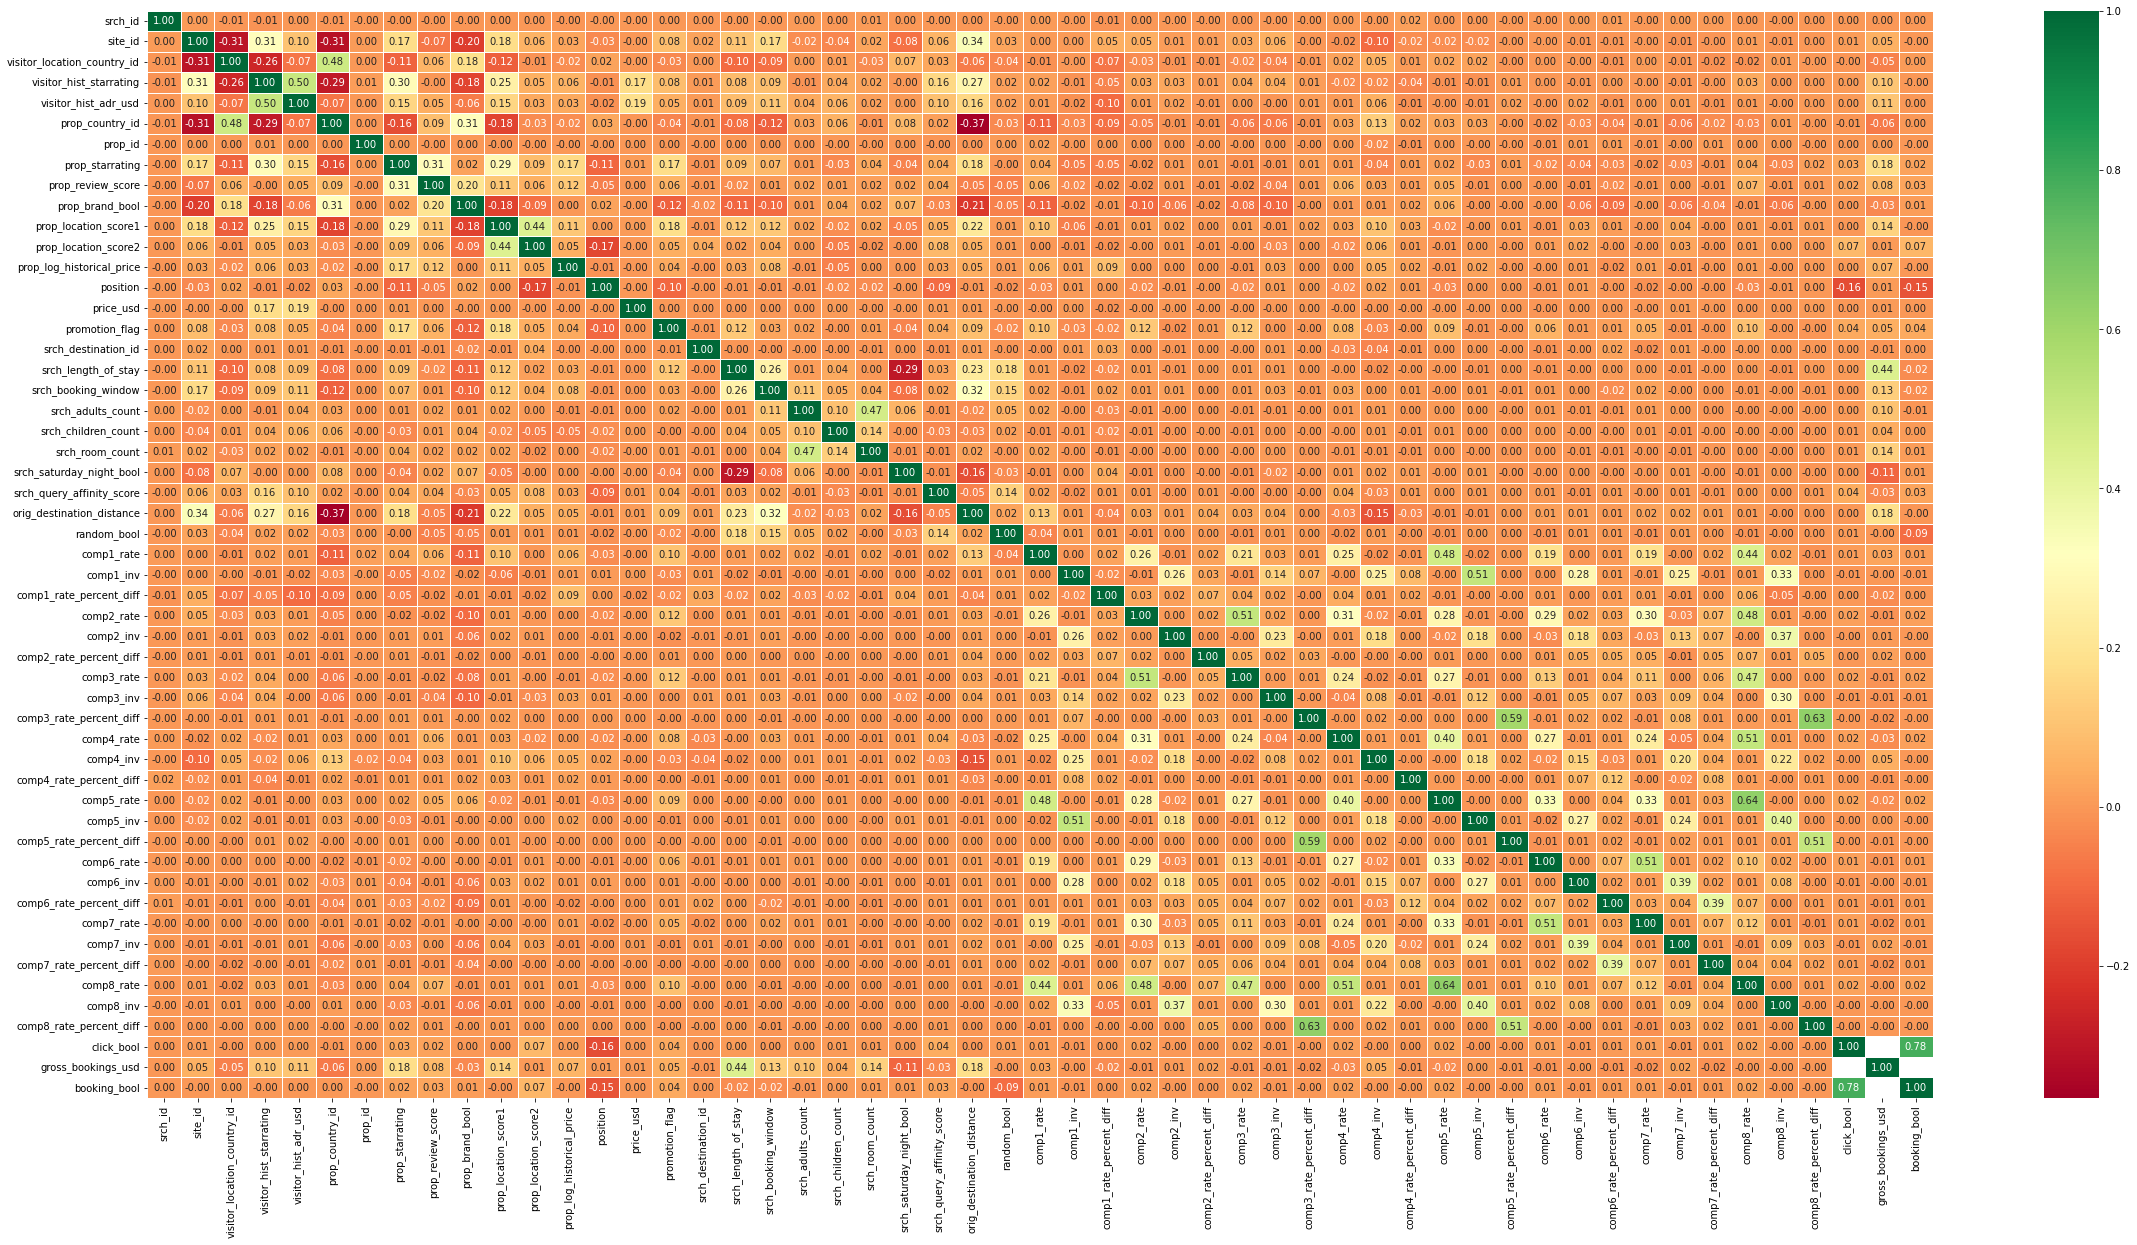

In [9]:
corr = data.corr()

sns.heatmap(
    data=corr,
    annot=True,
    fmt='.2f',
    linewidths=.5,
    cmap='RdYlGn',
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

fig = plt.gcf()
fig.set_size_inches(40, 20)

plt.show()

In [34]:
total_missing_data = data.isnull().sum().sort_values(ascending=False)

percent_of_missing_data = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data

,Total,Percent
comp1_rate_percent_diff,4863908,0.980954
comp6_rate_percent_diff,4862173,0.980604
comp1_rate,4838417,0.975813
comp1_inv,4828788,0.973871
comp4_rate_percent_diff,4827261,0.973563
gross_bookings_usd,4819957,0.972089
comp7_rate_percent_diff,4819832,0.972064
comp6_rate,4718190,0.951565
visitor_hist_starrating,4706481,0.949204
visitor_hist_adr_usd,4705359,0.948977


In [35]:
data.groupby('booking_bool').count().T

booking_bool,0,1
srch_id,4819957,138390
date_time,4819957,138390
site_id,4819957,138390
visitor_location_country_id,4819957,138390
visitor_hist_starrating,242778,9088
visitor_hist_adr_usd,243854,9134
prop_country_id,4819957,138390
prop_id,4819957,138390
prop_starrating,4819957,138390
prop_review_score,4812709,138274


In [36]:
data.groupby('click_bool').count().T

click_bool,0,1
srch_id,4736468,221879
date_time,4736468,221879
site_id,4736468,221879
visitor_location_country_id,4736468,221879
visitor_hist_starrating,240724,11142
visitor_hist_adr_usd,241786,11202
prop_country_id,4736468,221879
prop_id,4736468,221879
prop_starrating,4736468,221879
prop_review_score,4729360,221623


## 0~5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 6 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
dtypes: float64(2), int64(3), object(1)
memory usage: 227.0+ MB


array([[<AxesSubplot:title={'center':'srch_id'}>,
        <AxesSubplot:title={'center':'site_id'}>],
       [<AxesSubplot:title={'center':'visitor_location_country_id'}>,
        <AxesSubplot:title={'center':'visitor_hist_starrating'}>],
       [<AxesSubplot:title={'center':'visitor_hist_adr_usd'}>,
        <AxesSubplot:>]], dtype=object)

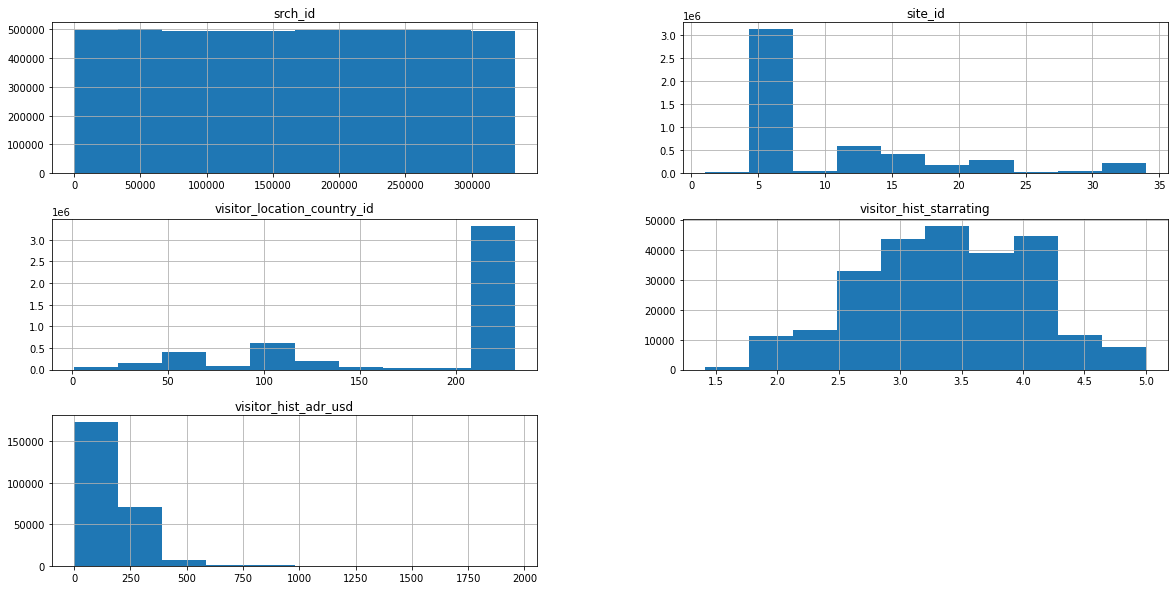

In [37]:
data_basic=data.iloc[:,0:6]
data_basic.info()
data_basic.hist(figsize=(20,10))

## 6~16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 11 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   prop_country_id            int64  
 1   prop_id                    int64  
 2   prop_starrating            int64  
 3   prop_review_score          float64
 4   prop_brand_bool            int64  
 5   prop_location_score1       float64
 6   prop_location_score2       float64
 7   prop_log_historical_price  float64
 8   position                   int64  
 9   price_usd                  float64
 10  promotion_flag             int64  
dtypes: float64(5), int64(6)
memory usage: 416.1 MB


array([[<AxesSubplot:title={'center':'prop_brand_bool'}>,
        <AxesSubplot:title={'center':'promotion_flag'}>]], dtype=object)

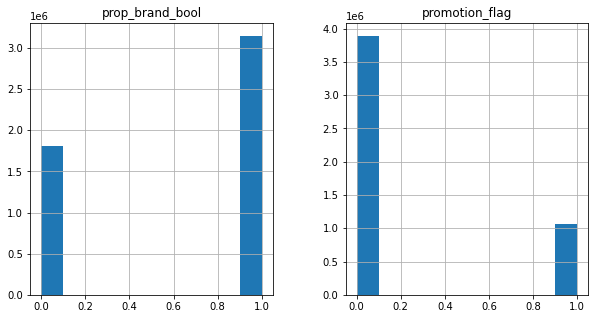

In [38]:
data_prop=data.iloc[:,6:17]
data_prop.info()
data_prop_cat=data_prop.loc[:,['prop_brand_bool','promotion_flag']]
data_prop_cat.hist(figsize=(10,5))

prop_country_id                  AxesSubplot(0.125,0.71587;0.133621x0.16413)
prop_id                       AxesSubplot(0.285345,0.71587;0.133621x0.16413)
prop_starrating                AxesSubplot(0.44569,0.71587;0.133621x0.16413)
prop_review_score             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
prop_location_score1          AxesSubplot(0.766379,0.71587;0.133621x0.16413)
prop_location_score2            AxesSubplot(0.125,0.518913;0.133621x0.16413)
prop_log_historical_price    AxesSubplot(0.285345,0.518913;0.133621x0.16413)
position                      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
price_usd                    AxesSubplot(0.606034,0.518913;0.133621x0.16413)
dtype: object

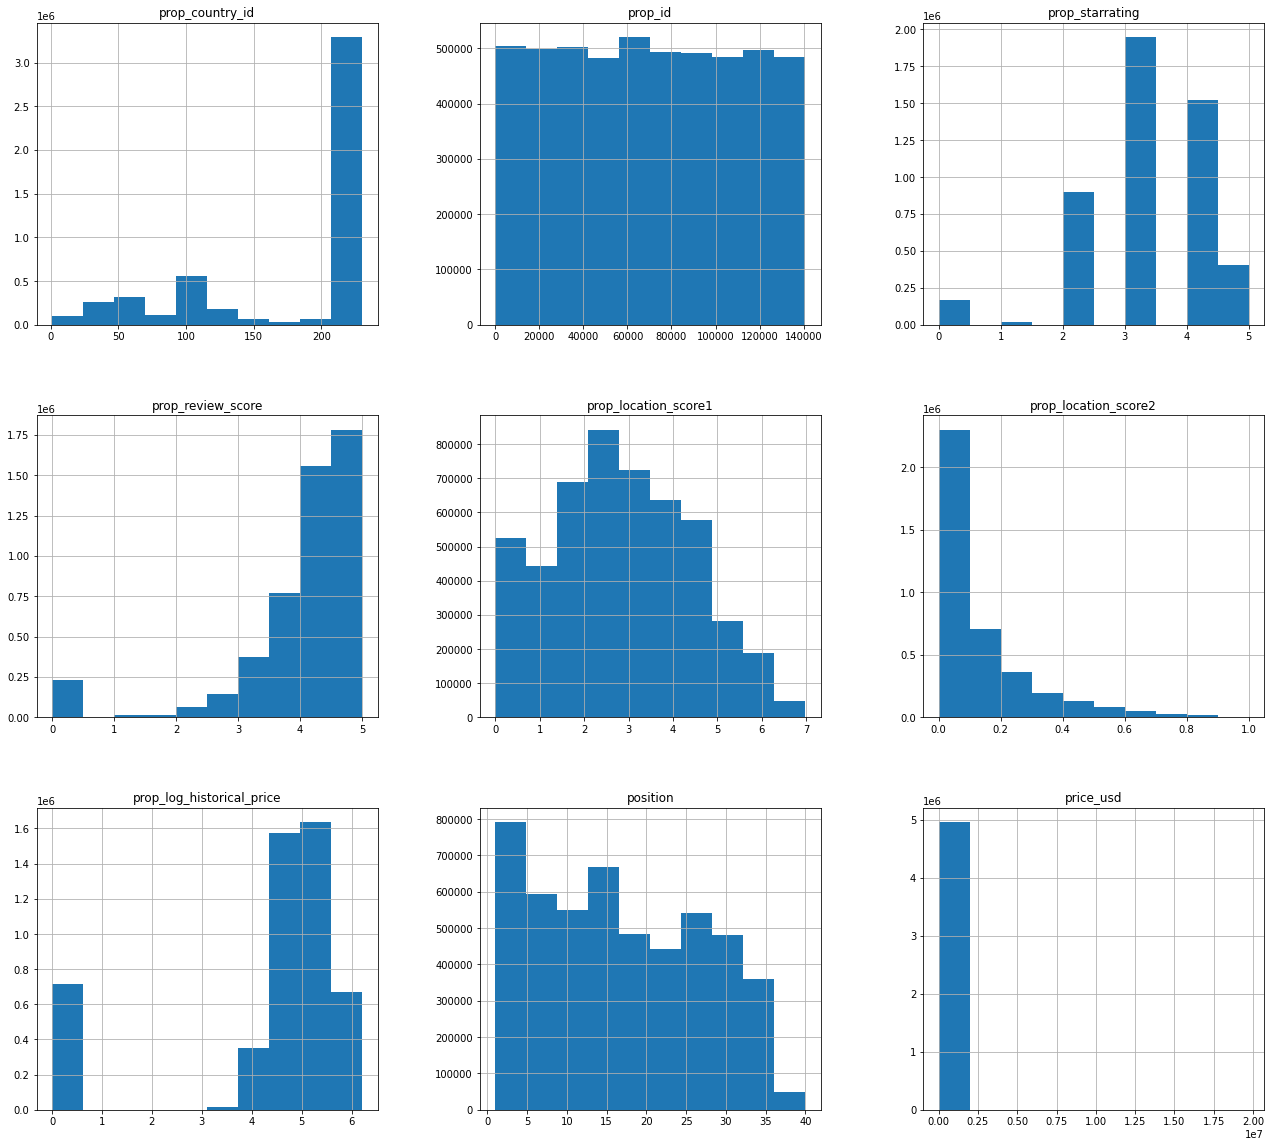

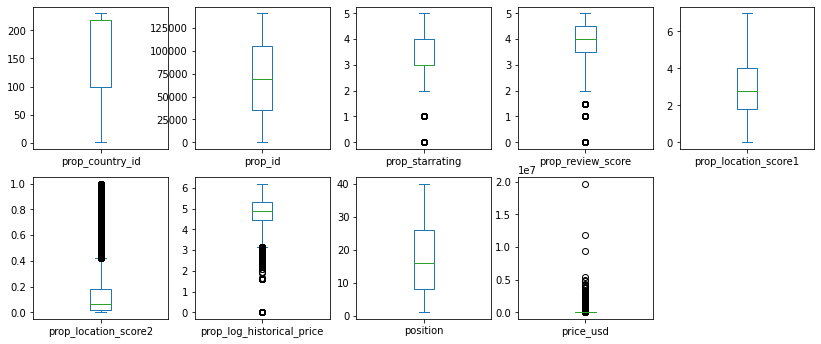

In [39]:
data_prop__non_cat=data_prop.loc[:,['prop_country_id','prop_id','prop_starrating','prop_review_score','prop_location_score1','prop_location_score2','prop_log_historical_price','position','price_usd']]
data_prop__non_cat.hist(figsize=(22,20))
data_prop__non_cat.plot(kind='box', subplots=True, layout=(4,5),figsize=(14,12))

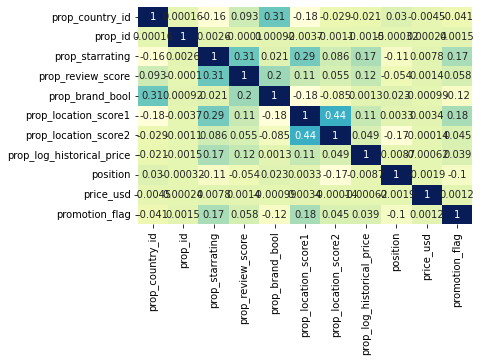

In [40]:
corr_prop= data_prop.corr()
ax2 = sns.heatmap(corr_prop, annot = True, cmap="YlGnBu", cbar=False)
plt.setp(ax2.axes.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize']=(20,20)

## 17~25

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 9 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   srch_destination_id        int64  
 1   srch_length_of_stay        int64  
 2   srch_booking_window        int64  
 3   srch_adults_count          int64  
 4   srch_children_count        int64  
 5   srch_room_count            int64  
 6   srch_saturday_night_bool   int64  
 7   srch_query_affinity_score  float64
 8   orig_destination_distance  float64
dtypes: float64(2), int64(7)
memory usage: 340.5 MB


srch_destination_id              AxesSubplot(0.125,0.71587;0.133621x0.16413)
srch_length_of_stay           AxesSubplot(0.285345,0.71587;0.133621x0.16413)
srch_booking_window            AxesSubplot(0.44569,0.71587;0.133621x0.16413)
srch_adults_count             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
srch_children_count           AxesSubplot(0.766379,0.71587;0.133621x0.16413)
srch_room_count                 AxesSubplot(0.125,0.518913;0.133621x0.16413)
srch_saturday_night_bool     AxesSubplot(0.285345,0.518913;0.133621x0.16413)
srch_query_affinity_score     AxesSubplot(0.44569,0.518913;0.133621x0.16413)
orig_destination_distance    AxesSubplot(0.606034,0.518913;0.133621x0.16413)
dtype: object

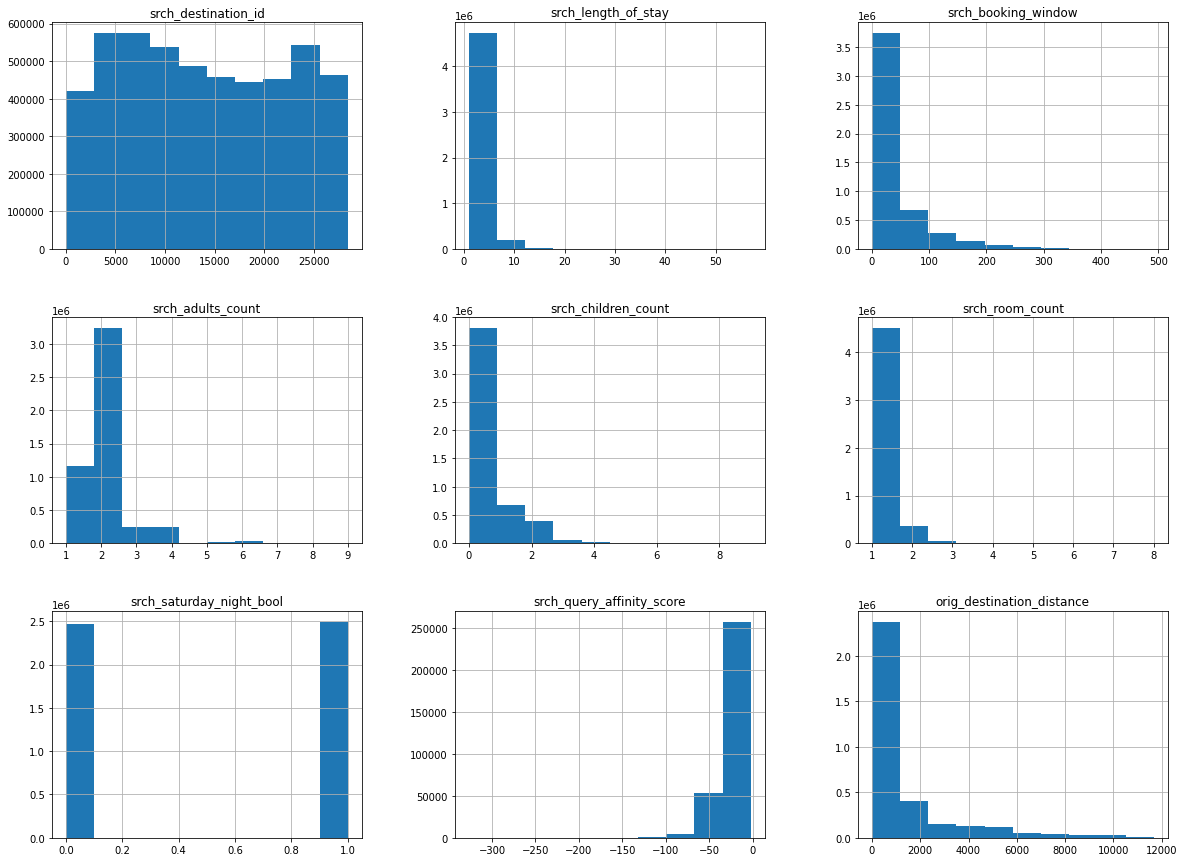

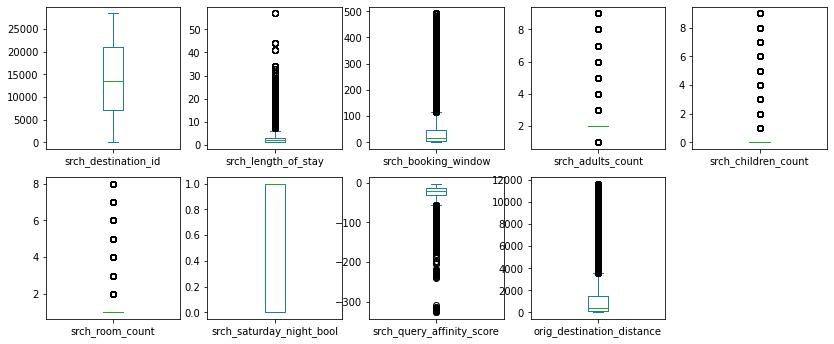

In [41]:
data_search=data.iloc[:,17:25]
data_search.info()
data_search.hist(figsize=(20,15))
data_search.plot(kind='box', subplots=True, layout=(4,5),figsize=(14,12))

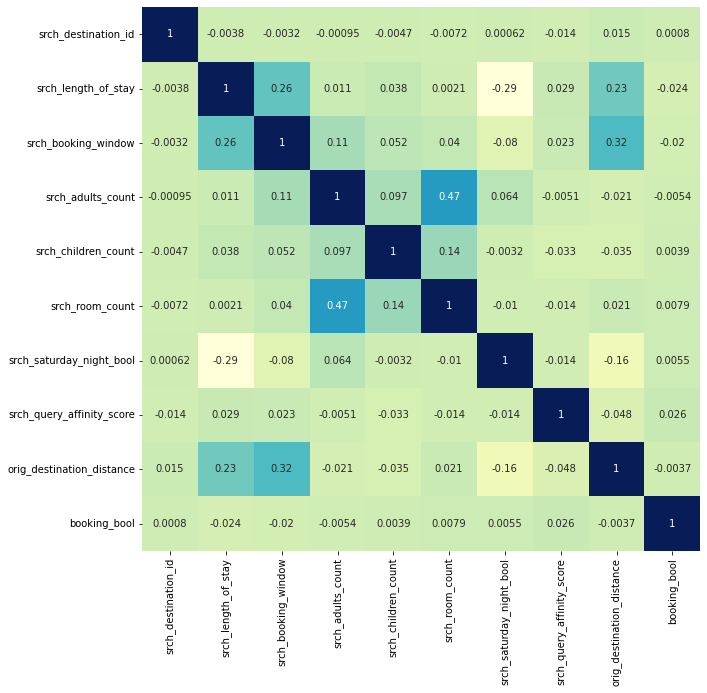

In [46]:
data_search['booking_bool']=data['booking_bool']
corr_search= data_search.corr()
ax2 = sns.heatmap(corr_search, annot = True, cmap="YlGnBu", cbar=False)
plt.setp(ax2.axes.get_xticklabels(), rotation=90)
plt.rcParams['figure.figsize']=(10,10)

## 27~50